### EDA STROKE
 
 Según la OMS 13 millones de personas sufren un ictus cada año, y aproximadamente 5,5 millones mueren como consecuencia. Es la principal causa de muerte y discapacidad en todo el mundo, y por eso su impacto es grave en todos los aspectos de la vida. El ictus no solo afecta a la persona que lo padece, sino también a su entorno social, familiar y laboral. Además, contrariamente a la creencia popular, puede ocurrirle a cualquier persona, a cualquier edad, sin importar el género ni la condición física.

 Un ictus se define como un trastorno neurológico agudo vascular que ocurre cuando se interrumpe el suministro de sangre a una zona del cerebro y por lo tanto las neuronas se ven privadas del oxígeno necesario. El ictus se divide en isquémico y hemorrágico y puede variar de leve a muy grave, con daños tanto permanentes como temporales. Las hemorragias en sí, son poco frecuentes y consisten en la rotura de un vaso sanguíneo que provocando un edema cerebral. Los ictus isquémicos, que son los más comunes, implican la interrupción del flujo sanguíneo a una zona del cerebro debido al estrechamiento o bloqueo de una arteria.
 
 Existen varios factores que aumentan la probabilidad de sufrir un ictus, como la edad (si una persona tiene más de 55 años, es claramente más propensa a verse afectada, sin embargo el ictus puede presentarse a cualquier edad, incluso en niños); la hipertensión; la presencia de ateroesclerosis ; el tabaquismo; el colesterol alto; la diabetes; la obesidad; el estilo de vida sedentario; el consumo de alcohol; los trastornos de la coagulación; la terapia con estrógenos o el uso de sustancias euforizantes como la cocaína y las anfetaminas.
 
 Basándonos en un dataset (obtenido de [Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)), vamos a realizar un análisis exploratorio de los principales factores de riesgo asociados al ictus. El objetivo es identificar patrones y relaciones entre las variables clínicas y demográficas que puedan contribuir a una mejor comprensión y, potencialmente, a una predicción temprana de esta patología. Este tipo de estudios resulta fundamental para apoyar la toma de decisiones clínicas, así como para diseñar estrategias de prevención más eficaces.
>

















In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency, skew, kurtosis
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import shapiro, ttest_ind, mannwhitneyu


In [ ]:
#Cargamos del datset seleccionado:

dataset_stroke = pd.read_csv('stroke.csv')

dataset_stroke.head()



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


A modo ilustrativo podemos ver a continuacion las primeras 5 filas del dataset, cada fila representa un paciente con su información relevante tanto a nivel clínico como socialdemográfico, todo en relación a la presencia o ausencia de ictus. Las variables en las columnas, corresponden a edad, sexo, presencia de hipertensión u otro tipo de enfermedad cardíaca, su estado civil, su area de residencia, el nivel de glucosa en sangre, su índice de masa corporal y finalmente su estado respecto al consumo de tabaco.

In [ ]:
dataset_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Como podemos ver, el dataset consta de 5.110 observaciones con las 12 variables previamente mencionadas. Veámoslo mas a detalle:

 1. **id**: De tipo numérico, corresponde al número identificativo de cada paciente.
 
 2. **gender**: De tipo categórico y puede tomar tres valores: 'Male' (Masculino), 'Female' (Femenino) u 'Other'(Otro).
 
 3. **age**: De tipo numérico, representa la edad del paciente en años.
 
 4. **hypertension**: De tipo numérico entero, aunque funciona como una variable categórica binaria, ya que toma valores de 0 (ausencia) y 1 (presencia).
 
 5. **heart_disease**: Con el mismo enfoque que la variable anterior
 
 6. **ever_married**: De tipo categórico la cual indica si el paciente ha estado alguna vez casado/a, con los valores posibles Yes (Sí) y No.
 
 7. **work_type**: De tipo categorico y representa el tipo de trabajo del paciente tomando 5 valores: 'private', 'self-employed', 'children', 'govmt-job' y 'never worked'.
 
 8. **Residence_type**: Del mismo tipo que el anterior aunque tomando solo 2 valores, 'rural' y 'urban'.

 9. **avg_glucose_level**: De tipo numérico continuo (float64) que representa el nivel promedio de glucosa en sangre del paciente, medido en mg/dL

 10. **bmi**: Corresponde al índice de masa corporal del paciente, expresado tambien como un valor numérico continuo. Cabe destacar que esta presenta valores nulos, con un 3,9% de los datos faltantes. 

 11. **smoking_status**: Variable de tipo categórico (object) que indica el estado de tabaquismo del paciente. Puede tomar cuatro valores distintos, 'never smoked', 'formerly smoked', 'smokes' y 'unknown'

 12. **stroke**: Variable de tipo númerico entero, aunque en verdad es una variable categórica binaria. Variable respuesta del estudio en cuestión. 

In [ ]:
dataset_stroke['bmi'] = dataset_stroke['bmi'].fillna(dataset_stroke['bmi'].median())

dataset_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Dado que la variable **bmi** presentaba valores nulos (alrededor de unos 200), se ha decidido imputar dichos valores para no perder información valiosa. Para ello hemos seleccionado la mediana, ya que esta es más robusta frente a los valores atípicos a diferencia de la media, además de que la proporción de valores faltantes no es muy alta (alrededor del 3,9% como se ha mencionado en apartados anteriores).

Luego hemos verificado que la columna **bmi** contenga los 5110 valores completos, y como se puede observar, el procedimiento ha sido correctamente aplicado. 



In [ ]:
dataset_stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64


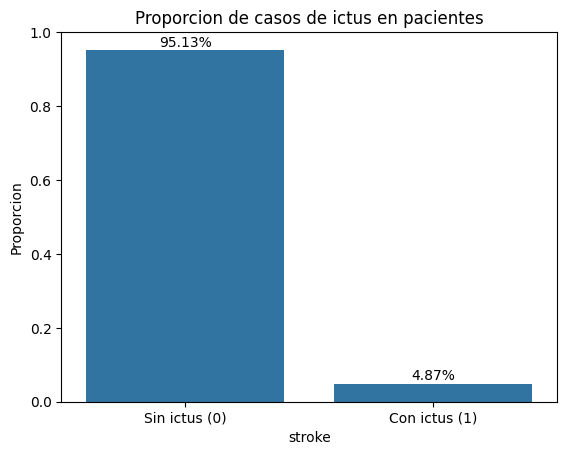

In [ ]:


proporcion_stroke = dataset_stroke['stroke'].value_counts(normalize=True)
print(proporcion_stroke)

sns.barplot( x=proporcion_stroke.index, y=proporcion_stroke.values)
plt.xticks([0,1], ['Sin ictus (0)', 'Con ictus (1)'])
plt.ylabel('Proporcion')
plt.title('Proporcion de casos de ictus en pacientes')
plt.ylim(0,1)
for i, v in enumerate(proporcion_stroke.values):
    plt.text(i, v + 0.01, f'{v:.2%}', ha='center')
plt.show()

De las 7 variables numéricas presentes en el dataset,  mostramos el resumen descriptivo para de cada una de ellas:

1. **id**: Sin relevancia analítica, puesto que corresponde al numero identificativo de cada paciente.

2. **age**: La edad media ronda los 43,2 años, con un rango que abarca desde los 0.08 a los 82 años. El valor mínimo tan bajo puede deberse a la presencia de neonatos en el estudio.

3. **hypertension**: Codificada como entero pese a ser una variable categórica binaria, aunque de aquí podemos deducir que el 9,7% presenta hipertensión

4. **heart_disease**: De la misma forma que lo anterior, es una variable categórica binaria. En este caso podemos deducir que el 54% presenta patologías cardiovasculares

5. **avg_glucose_level**: El nivel promedio de glucosa en sangre corresponde a 106,15 mg/dl, su alta desviación estandar (con un valor de 45,28) indica la posible presencia de valores extremos.

6. **bmi**: El índice de masa corporal promedio es de 28,86, lo que indica una gran predominancia de sobrepeso en la muestra. Su máximo de 97,6 indica tambien la presencia de valores extremos. 

7. **stroke**: Variable respuesta de nuestro estudio, aunque es numérica también es una variable categórica binaria. Esta se encuentra altamente desbalanceada ya que únicamente el 4,87% de los casos presentan ictus lo que es importante a considerar más adelante.

In [ ]:
#Definimos las variables cuantitativas y cualitativas.

vars_cuantitativas = ['age','avg_glucose_level','bmi']
vars_cualitativas = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']

Con el objetivo de facilitar el análisis exploratorio, vamos a realizar la clasificación de las variables del dataset en cuantitativas y cualitativas. Las variables cuantitativas (age, avg_glucose_level, bmi) son aquellas que representan medidas numéricas y permiten realizar operaciones aritméticas. Por otro lado, las variables cualitativas (gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status) son de naturaleza categórica, ya que representan atributos o categorías (aunque como ya se ha mencionado anteriormente, algunas como hypertension y heart_disease sean binarias). 

De esta forman podremos aplicar las técnicas de análisis adecuadas a cada tipo de variable.

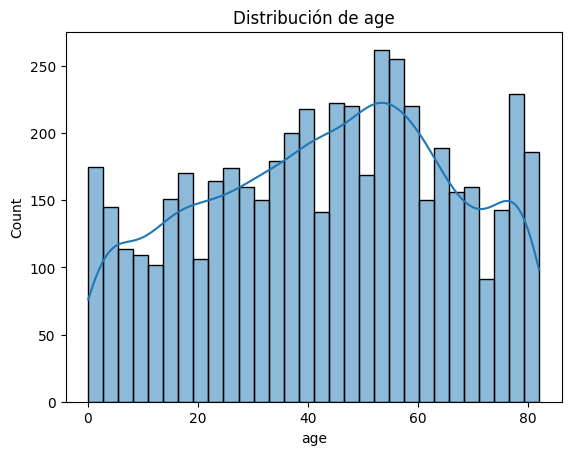

Variable: age
Asimetría (skewness): -0.137
Curtosis: -0.991



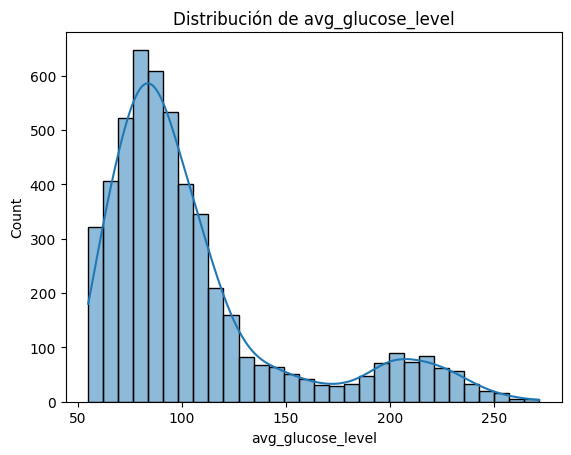

Variable: avg_glucose_level
Asimetría (skewness): 1.572
Curtosis: 1.678



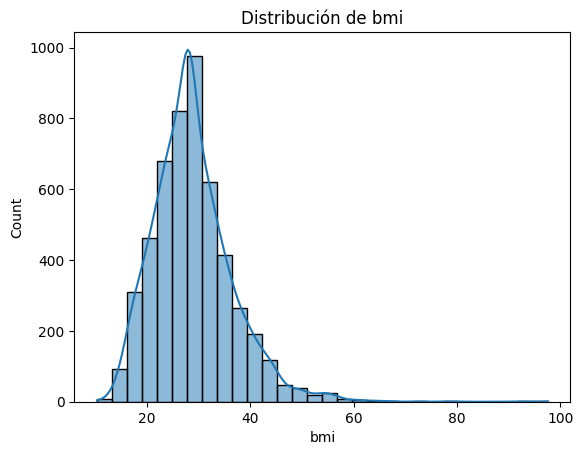

Variable: bmi
Asimetría (skewness): 1.088
Curtosis: 3.631



In [ ]:
for col in vars_cuantitativas:
    sns.histplot(dataset_stroke[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.show()
    print(f"Variable: {col}")
    print(f"Asimetría (skewness): {skew(dataset_stroke[col]):.3f}")
    print(f"Curtosis: {kurtosis(dataset_stroke[col]):.3f}\n")

Mediante la realización de histogramas con curvas de densidad superpuestas para cada una de las variables cuantitativas, así como la obtención de los coeficientes de asimetría y de curtosis, obtenemos la siguiente información:

1. **age**: La distribución de esta variable muestra una representación relativamente homogénea de los distintos rangos de edad, con una forma platicúrtica y casi simétrica, como puede observarse en el gráfico. Aunque se aprecian algunos picos, especialmente en torno a los 50 años, predomina una ligera presencia de personas de edad avanzada, lo cual es esperable dado que la edad es un factor de riesgo importante en el desarrollo de ictus. El valor de asimetría (-0.137) indica un sesgo leve hacia la izquierda, pero al estar próximo a cero, puede considerarse prácticamente simétrico. Asimismo, la curtosis (-0.991) confirma la presencia de una distribución platicúrtica, con menor concentración de datos en el centro y mayor dispersión hacia los extremos. No obstante, resulta importante señalar que la distribución observada podría no reflejar fielmente la realidad poblacional: el hecho de que la variable edad parezca haberse distribuido uniformemente entre los 0 y los 80 años nos indica una posible estratificación artificial de la muestra. De tal forma que, se podrian haber sesgado los resultados al alterar las proporciones reales de edad, limitando así la validez del análisis y afectando la detección de asociaciones reales con el ictus.

2. **avg_glucose_level**: Esta variable presenta una distribución clara hacia la derecha, la mayor parte de las observaciones se encuentran entre los 70 mg/dl y los 130 mg/dl, lo que se sítua en el rango habitual para los valores normales de glucosa. Cabe destacar también la presencia de una cola larga en torno a los 200 mg/dl, surigiendo la presencia de pacientes con niveles muy elevados, que se podrian correlacionar con aquellos que manifiestan un cuadro de diabetes. Ademas la presencia de un segundo pico en torno al valor previamente mencionado, parece indicar tambien la bimodalidad de la muestra, aunque muy leve. El valor de asimetría de 1,572 valida este sesgo a la derecha anteriormente mencionado como resultado de la presencia de dicha cola en el extremo superior. La curtosis con un valor de 1,678 indica distribucion ligeramente platicúrtica en comparación a la distribución normal (la cual toma un valor de 3) indicando que la distribución para esta variable es mas plana y menos concentrada en picos. 

3. **bmi**: Esta variable presenta una distribución ligeramente asimétrica, con la presencia de una cola hacia la derecha, indicándonos la existencia de algunos valores extremos elevados en el I.M.C. El coeficiente de asimetría de 1,008 revela un sesgo moderado hacia la derecha, lo cual concuerda con lo observado en la gráfica. Esto nos sugiere que aunque la mayoría de los individuos tienen valores de I.M.C dentro de un rango normal o de sobrepeso, hay una proporción menor con valores considerablemente más altos. Por otro lado, el valor de curtosis de 3,631 indica una distribución leptocúrtica, de tal forma que nos dice que los datos están más concentrados alrededor de la media y presentan colas más pesadas que una distribución normal. Y por lo tanto, una mayor frecuencia de valores próximos al centro y un menor grado de dispersión extrema, aunque los valores extremos, cuando aparecen, son significativos.



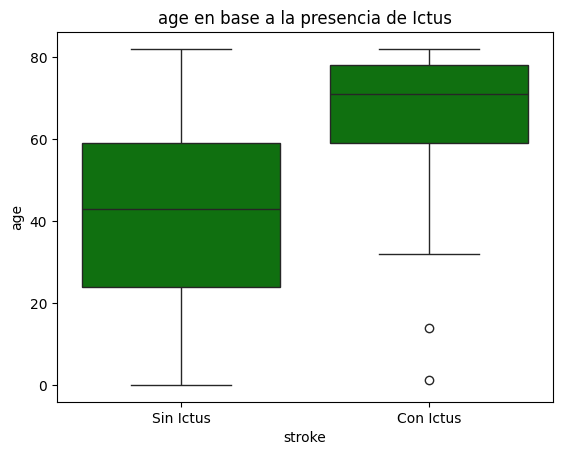

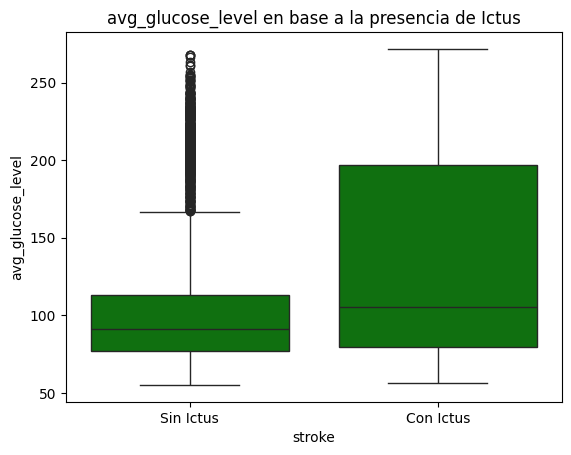

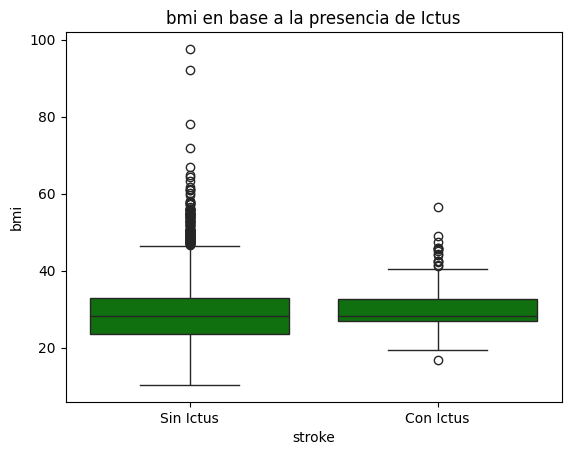

In [ ]:
for col in vars_cuantitativas:
    sns.boxplot(x='stroke', y=col, data=dataset_stroke, color='green')
    plt.title(f'{col} en base a la presencia de Ictus')
    plt.xticks([0,1], ['Sin Ictus', 'Con Ictus'])
    plt.show()

Si realizamos comparativas para cada variable respecto a la presencia y ausencia de ictus. Llegamos a la siguiente conclusión:

1. **age**: El boxplot para esta variable muestra diferencias claras para los grupos analizados. En el grupo 'sin ictus', la mediana se situa en torno a los 40 años aproximadamente, sugiriendo una concentración de invididuos jóvenes y de mediana edad. Por otro lado para el grupo 'con ictus', esta se ve elevada hasta casi los 70 años de que tal forma que se muestra una mayot prevalencia del ictus en personas de edad avanzada. Este resultado es consistente con el hecho de que la edad es un factor clave de riesgo para la aparición y desarollo de isquemias cerebrales. En este último grupo es notable señalar la presencia de 2 valores atípicos, situados en torno a los 0 y 15 años. Estos podrian deberse a errores en la introducción de los datos o a casos clíncos concretos de naturaleza atípica.

2. **avg_glucose_level**: El boxplot de esta variable nos muestra diferencias notables entre los grupos analizados. En el grupo 'sin ictus', la mediana de los niveles de glucosa en sangre se sitúa en torno a los 90 mg/dL, con una distribución relativamente concentrada, lo que sugiere valores normales o moderados en esta población. Por el contrario, en el grupo 'con ictus', la mediana es considerablemente más alta, situándose por encima de los 110 mg/dL, con una dispersión mucho mayor llegando al rango de los 250 mg/dl. Este hallazgo respalda la posible asociación entre la hiperglucemia (y potencialmente, la diabetes) y la presencia de ictus, ya que la glucosa elevada es un factor de riesgo conocido para eventos cerebrovasculares. Sin embargo, grupo 'sin ictus' presenta una gran cantidad de valores atípicos en los niveles de glucosa en el rango de los 200-250 mg/dL, mientras que en el grupo con ictus no se observan outliers, aunque sí una mayor dispersión de los datos. Esto parece indicarnos que, aunque la hiperglucemia, y por lo tanto la diabetes, se asocia con el ictus, pueden existir casos excepcionales en pacientes sin ictus que presentan niveles elevados de glucosa.

3. **bmi**: En el grupo 'sin ictus', la mediana se sitúa en torno a los 28, lo que corresponde a un rango cercano al sobrepeso según los criterios de la OMS. La dispersión de los datos es relativamente amplia, con un bigote superior que se extiende hasta aproximadamente 47 y una gran cantidad de outliers que se proyectan desde los 60, hasta cerca de 100. El grupo 'con ictus' muestra una mediana muy similar, también en torno a 28, lo que indica que el valor central del I.M.C es comparable entre ambos grupos. Sin embargo, se observa una menor dispersión de los datos, con un bigote superior que no sobrepasa los 40 y outliers que alcanzan como máximo los 60. En cualquier caso, la similitud en las medianas sugiere que, a diferencia de otras variables como la edad o la glucosa, el IMC por sí solo podría no ser un diferenciador tan fuerte entre ambos grupos y más en base a la presencia de tal cantidad de outliers en el grupo sin ictus, aunque la presencia de obesidad sigue siendo un factor de riesgo relevante a considerar.



Frecuencias de gender en porcentaje:
gender
Female    58.590998
Male      41.389432
Other      0.019569
Name: proportion, dtype: float64
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


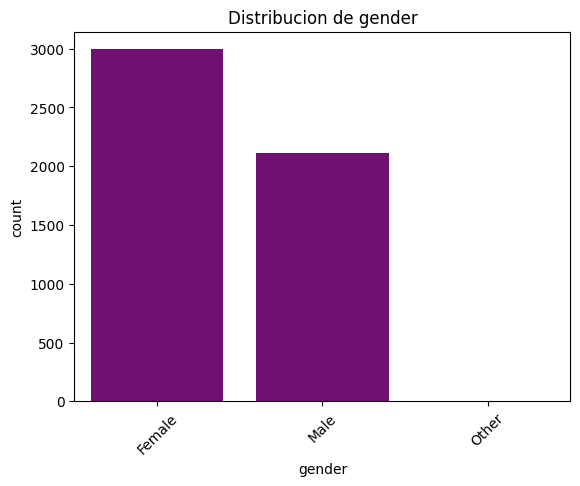

Frecuencias de hypertension en porcentaje:
hypertension
0    90.254403
1     9.745597
Name: proportion, dtype: float64
hypertension
0    4612
1     498
Name: count, dtype: int64


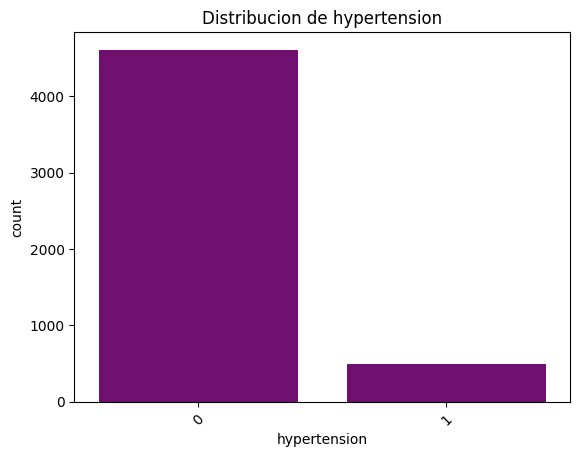

Frecuencias de heart_disease en porcentaje:
heart_disease
0    94.598826
1     5.401174
Name: proportion, dtype: float64
heart_disease
0    4834
1     276
Name: count, dtype: int64


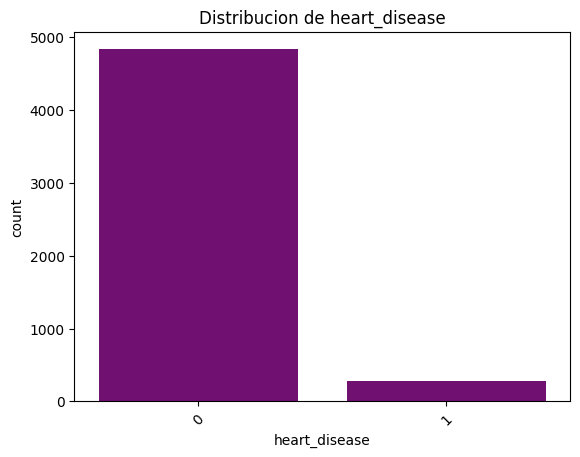

Frecuencias de ever_married en porcentaje:
ever_married
Yes    65.616438
No     34.383562
Name: proportion, dtype: float64
ever_married
Yes    3353
No     1757
Name: count, dtype: int64


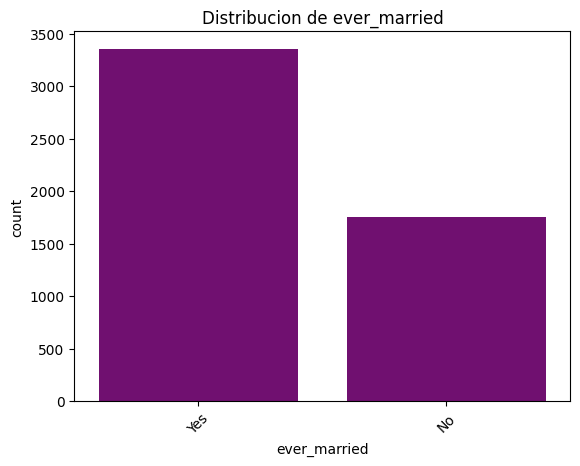

Frecuencias de work_type en porcentaje:
work_type
Private          57.240705
Self-employed    16.027397
children         13.444227
Govt_job         12.857143
Never_worked      0.430528
Name: proportion, dtype: float64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


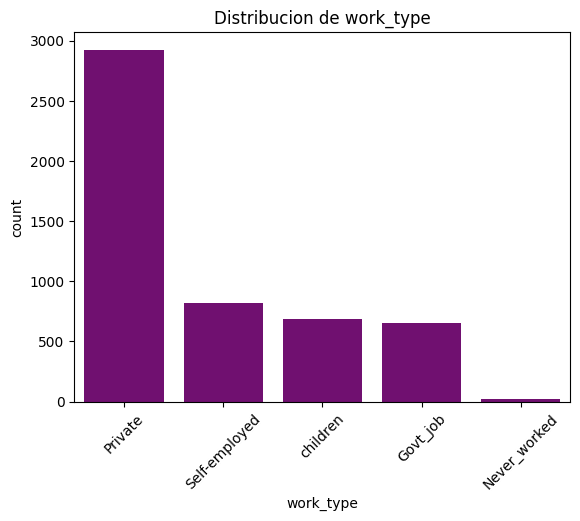

Frecuencias de Residence_type en porcentaje:
Residence_type
Urban    50.802348
Rural    49.197652
Name: proportion, dtype: float64
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64


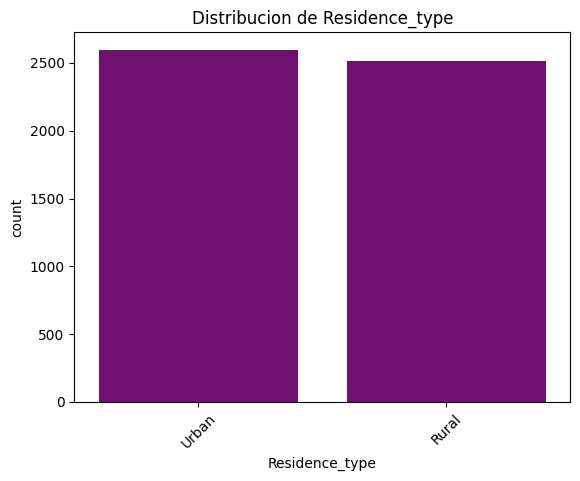

Frecuencias de smoking_status en porcentaje:
smoking_status
never smoked       37.025440
Unknown            30.215264
formerly smoked    17.318982
smokes             15.440313
Name: proportion, dtype: float64
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


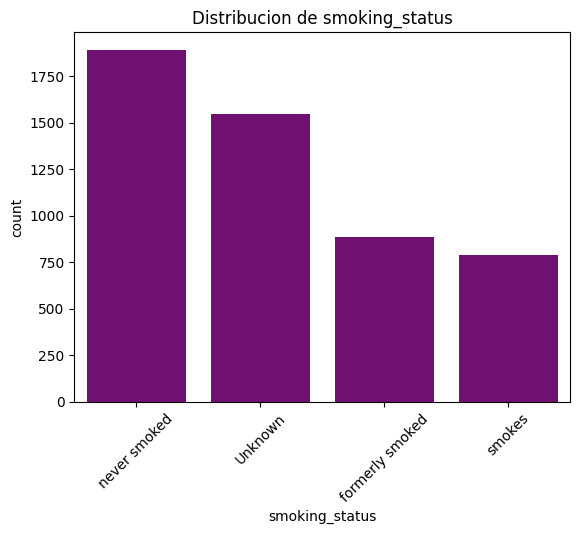

In [ ]:
for col in vars_cualitativas:
    print(f"Frecuencias de {col} en porcentaje:")
    print(dataset_stroke[col].value_counts(normalize=True) * 100)
    print(dataset_stroke[col].value_counts(dropna=False))
    sns.countplot(data = dataset_stroke, x=col, order=dataset_stroke[col].value_counts().index, color='purple')
    plt.title(f'Distribucion de {col}')
    plt.xticks(rotation=45)
    plt.show()

En relacion a las variables categoricas, obtenemos los siguientes resultados en base a sus frecuencias:

1. **gender**:  La distribución muestra que el conjunto de datos está compuesto mayoritariamente por mujeres, con un total de 2994 pacientes femeninos (aproximadamente el 58,6 % del total), seguidas por hombres con 2115 pacientes (alrededor del 41,4 %). Además, se registra un único caso categorizado como "Other", lo que representa una proporción ínfima del conjunto de datos. Hay que tener en cuenta de que esta sobrerrepresentación del género femenino puede influir en los resultados y debería tenerse en cuenta en los análisis posteriores, especialmente en aquellos que busquen establecer relaciones entre el género y la ocurrencia de ictus.

2. **hypertension**: De los 5110 pacientes presentes del dataset, 498 individuos (aproximadamente el 9,75 %) presentan hipertensión, mientras que los 4612 restantes (90,25 %) no la padecen. La baja proporción de pacientes hipertensos podría influir en la capacidad para detectar patrones asociados a esta condición, por lo que es importante considerar este desbalance en los análisis posteriores.

3. **heart_disease**: Para los 5110 individuos en total, 276 presentan antecedentes de enfermedades cardíacas, aproximadamente un 5,4% del total. Por otro lado, 4834 no presentan ningún tipo de patología (94,6%). Al igual que ocurre en la variable anterior, este desequilibrio presente en la representación de pacientes puede afectar al estudio provocando un sesgo si se quieren realizar predicciones en base a estos datos. 

4. **ever_married**: Esta variable categorica nos indica si el paciente indica si el paciente ha estado alguna vez casado. Para este conjunto de datos, 3353 pacientes (aproximadamente un 65,6 %) han estado casados/as en algún momento, mientras que 1757 (34,4 %) no lo han estado. Si bien su relación directa con la aparición de ictus no es inmediata, podría actuar como una variable proxy de la variable edad, la cual si que tiene un impacto indirecto en el riesgo de eventos cerebrovasculares.

5. **work_type**: Para esta variable se observa que la mayoría de los pacientes, trabaja en el sector privado con una representación del 57% del total. Seguido de auto-empleo con un valor del 16.02% (819), trabajo gubernamental con 12.86% (657), y children con 13.44% (687), representando a pacientes menores de edad aún sin historial laboral. Un grupo mucho más reducido, Never_worked, incluye tan solo 22 individuos lo que supone el 0,43% de los valores totales.

6. **residence_type**: Esta variable nos muestra una distribución casi equilibrada entre las dos categorías: Urban y Rural. De acuerdo con las frecuencias relativas, el 50.80% de los registros corresponden a individuos que viven en áreas urbanas, mientras que el 49.20% restante viven en áreas rurales.

7. **smoking_status**: En este caso, el 37.03% de los registros corresponden a individuos que nunca han fumado, seguido por un 30.22% con información desconocida sobre el hábito de fumar. Un 17.32% de los registros pertenecen a personas que han fumado anteriormente y un 15.44% a aquellos que actualmente fuman. 


Frecuencias absolutas para gender:
 gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


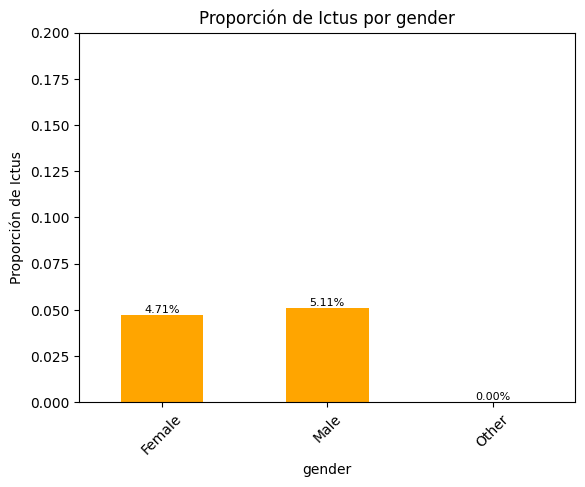


Frecuencias absolutas para hypertension:
 hypertension
0    4612
1     498
Name: count, dtype: int64


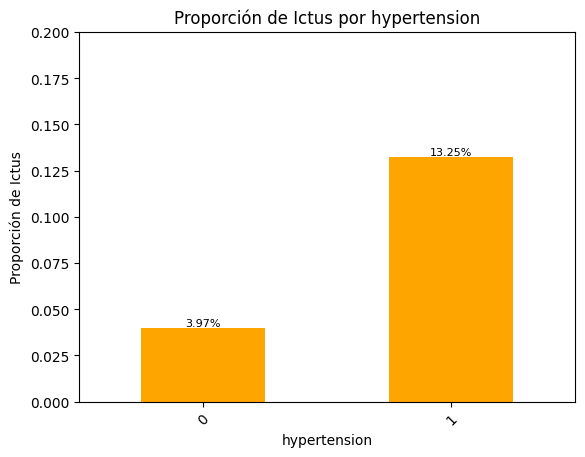


Frecuencias absolutas para heart_disease:
 heart_disease
0    4834
1     276
Name: count, dtype: int64


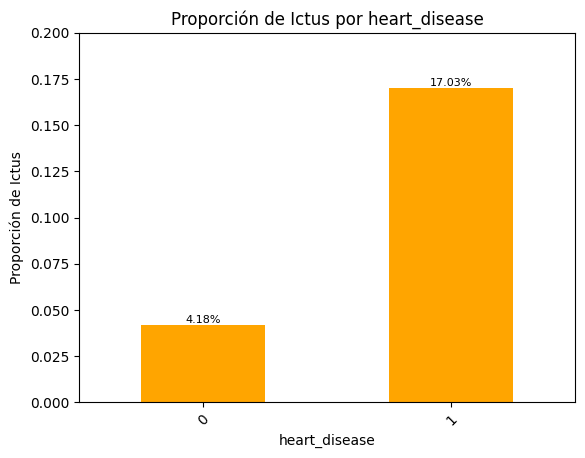


Frecuencias absolutas para ever_married:
 ever_married
Yes    3353
No     1757
Name: count, dtype: int64


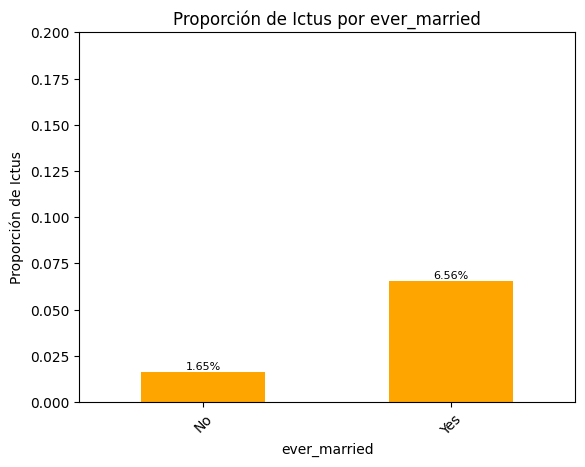


Frecuencias absolutas para work_type:
 work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


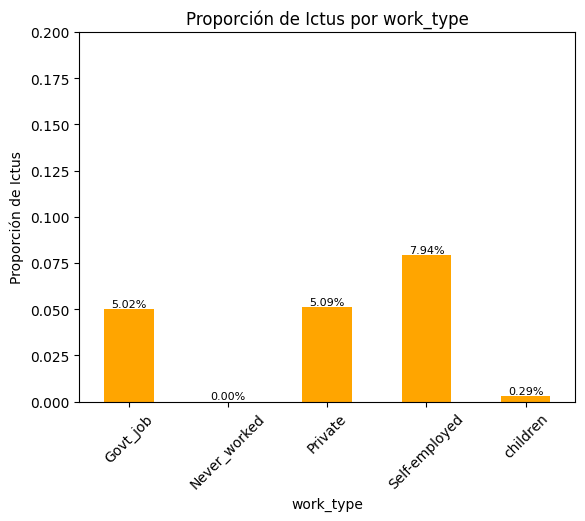


Frecuencias absolutas para Residence_type:
 Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64


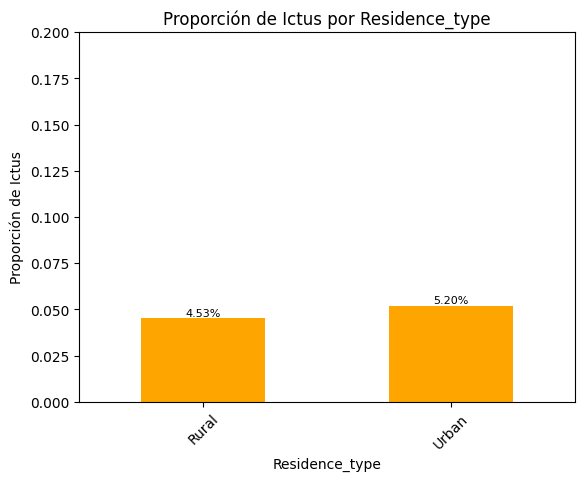


Frecuencias absolutas para smoking_status:
 smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


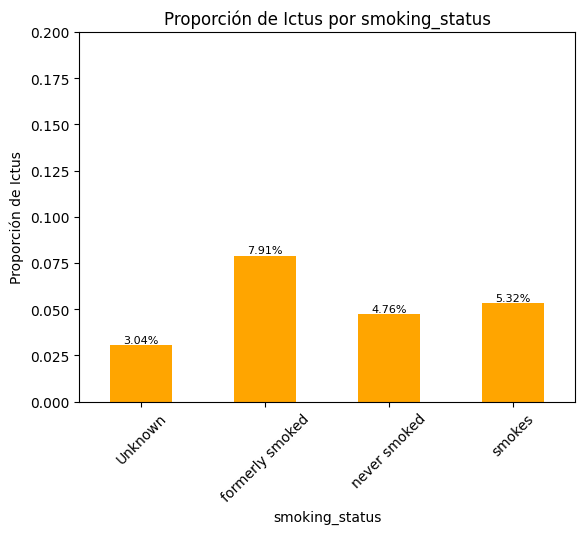

In [ ]:
for col in vars_cualitativas:
    frecuencias = dataset_stroke[col].value_counts()
    print(f'\nFrecuencias absolutas para {col}:\n', frecuencias)
    proporcion_stroke = pd.crosstab(dataset_stroke[col], dataset_stroke['stroke'], normalize='index')
    ax = proporcion_stroke[1].plot(kind='bar', color='orange')
    plt.title(f'Proporción de Ictus por {col}')
    plt.ylabel('Proporción de Ictus')
    plt.ylim(0, 0.2)
    plt.xticks(rotation=45)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=8)
    plt.show()


Entrando mas en detalle, hemos estudiado cada una de las variables categoricas dentro del grupo 'con stroke' en relación a las frecuencias absolutas obteniendosé los siguinetes resultados:

1. **gender**: El gráfico para gender, observando la proporcion de casos dentro del grupo con ictus, vemos valores muy similares entre mujeres (aproximadamente 4,7%) y hombres (alrededor de 5,1%), mientras que en la categoría "Other" la proporción es prácticamente nula en este caso.

2. **hypertension**: En el caso de la variable hipertensión, las personas hipertensas presentan una proporción de ictus notablemente mayor (13,25%) en comparación con aquellas sin hipertensión (3,97%).

3. **ever_married**: La proporción de ictus en el caso de estado civil, es mayor en personas que han estado casadas (6,56%) en comparación con aquellas que nunca se han casado (1,65%).

4. **work_type**: La distribución de la variable 'work_type' muestra que el 5,02% de los individuos tienen un trabajo en el sector público (gov_job), el 0,0% nunca han trabajado (never_worked), el 5,09% trabaja en el sector privado (private), el 7,94% son autónomos (self_employed), y el 0,29% son niños (children).

5. **residence_type**: La proporcion que nos muestra en el gráfico para la variable 'residence type' muestra una proporcion similar entre ambas areas, rural (4,53%) y urbana (5,20%) y aparentemente no supone un factor decisivo en el desarollo de ictus 

6. **smoking_status**: La distribución de la variable 'smoking_status' muestra que el 3,04% de los individuos tienen el estatus 'Unknown', el 7,91% han fumado anteriormente, el 4,76% nunca han fumado, y el 5,32% fuma actualmente. Estas proporciones indican que una parte significativa del grupo tiene un historial de consumo de tabaco, con una proporción notable de individuos con estatus desconocido.

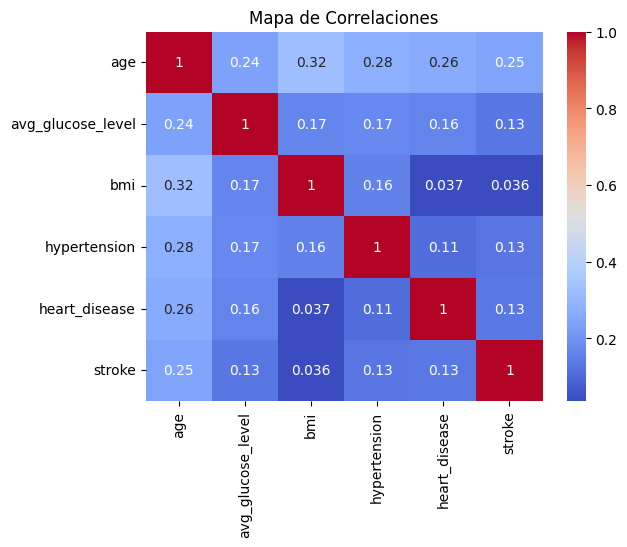

In [ ]:
corr = dataset_stroke[['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Mapa de Correlaciones")
plt.show()

El mapa de correlaciones que hemos obtenido nos muestra que la variable **stroke** como tal presenta correlaciones bajas con el resto de variables numéricas dataset. La mayor correlación se da con **age** (0,25), seguida de **0avg_glucose_level** (0,13), **hypertension** (0,13) y **heart_disease** (0,13), aunque en todos los casos la fuerza de la asociación entre ambas es débil. Sugiriéndonos que, aunque factores como la edad, los niveles de glucosa, la hipertensión y las enfermedades cardíacas pueden estar relacionados con la aparición de ictus, su relación no es muy fuerte de forma individual. Por otro lado, la correlación entre bmi y stroke es prácticamente nula (0,036), indicando que el índice de masa corporal no tiene una relación lineal clara con la aparición de ictus en esta muestra.

En terminos del resto de variables, la correlación más notable se observa entre **age** y **bmi** (0,32), indicando que a mayor edad tiende a aumentar ligeramente el índice de masa corporal, lo que es lógico ya que la edad induce una disminución de la tasa metabólica y por lo tanto un aumento en peso, aunque en edades avanzadas este disminuye. Aun así, la relación presente sigue siendo moderada. También existe una correlación entre **age** y **hypertension** (0,28), y entre **age** y **heart_disease** (0,26), lo cual es esperable, ya que la edad avanzada se asocia con mayor riesgo de hipertensión y enfermedades cardíacas.

En cuanto a **avg_glucose_level**0, presenta correlaciones débiles y similares con **age**, **bmi**, **hypertension** y **heart_disease** (todas en torno a 0,16-0,17), lo que sugiere que los niveles de glucosa aumentan ligeramente en presencia de estos factores, pero sin una asociación fuerte. Pese a que un aumento de los niveles de azúcar si que se asocian con la presencia de patologías cardiovasculares y por ende con la diabetes. 

Respecto a **hypertension** y **heart_disease**, su correlación es baja (0,11), a pesar de que la bibliografía indica una correlación clara entre ambas. Este resultado podría deberse a la composición de la muestra o a la presencia de otras variables que modulan esta relación.

Por último, **bmi** muestra correlaciones muy bajas con el resto de variables, destacando su casi nula asociación tanto con **heart_disease** (0,037) como con **stroke** (0,036), lo que indica que, en esta población, el índice de masa corporal no parece ser un factor linealmente determinante ni para las enfermedades cardíacas ni para el ictus.

In [ ]:
for var in vars_cualitativas:
    contingency_table = pd.crosstab(dataset_stroke['stroke'], dataset_stroke[var])
    if contingency_table.shape[1] > 1:  
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Prueba chi-cuadrado para Ictus y {var} - p-valor: {p}")

Prueba chi-cuadrado para Ictus y gender - p-valor: 0.7895490538408245
Prueba chi-cuadrado para Ictus y hypertension - p-valor: 1.661621901511823e-19
Prueba chi-cuadrado para Ictus y heart_disease - p-valor: 2.0887845685229236e-21
Prueba chi-cuadrado para Ictus y ever_married - p-valor: 1.6389021142314745e-14
Prueba chi-cuadrado para Ictus y work_type - p-valor: 5.397707801896119e-10
Prueba chi-cuadrado para Ictus y Residence_type - p-valor: 0.29833169286876987
Prueba chi-cuadrado para Ictus y smoking_status - p-valor: 2.0853997025008455e-06


Como añadido se han realizado pruebas de independencia chi-cuadrado para evaluar la asociación entre el diagnóstico de ictus y las diversas variables cualitativas. Los resultados obtenido han sido los siguientes:

1. **Gender**: El p-valor obtenido (0,7895) es muy superior al nivel de significancia habitual el cual se sitúa en 0,05, indicándonos que no existe una asociación estadísticamente significativa entre el género y la presencia de ictus en esta muestra.

2. **Hypertension** : Para la hipertensión , el p-valor obtenido es extremadamente bajo (1,66e-19), de tal forma que concluimos que existe una asociación significativa entre padecer hipertensión y el riesgo de sufrir un ictus. Este resultado es coherente con la literatura médica, que identifica la hipertensión como un importante factor de riesgo.

3. **Heart disease**: Con un p-valor de 2,08e-21, se confirma una relación significativa entre sufrir enfermedades cardíacas y presentar un ictus, reforzando su papel como comorbilidad de acuerdo a la bibliografía ya existente.

4. **Ever married**: El p-valor obtenido (1,64e-14) nos indica una asociación estadísticamente significativa entre el estado civil  y la presencia de ictus. Este hallazgo podría estar correlacionado a otros factores como la edad, el estilo de vida o el apoyo social, lo que igual requeriría un análisis más profundo.

5. **Work type**: Para esta variable, el p-valor (5,40e-10) nos revela una asociación significativa entre el tipo de empleo y el ictus. Sugiriéndonos que las condiciones laborales del trabajo, como el realizar esfuerzo físico, el estrés o la inactividad podrían estar influyendo en el riesgo de padecer un ictus.

6. **Residence type**: Con un p-valor de 0,2983, no se observa una relación significativa entre vivir en zona urbana o rural y la aparición de ictus.

7. **Smoking status**: Para esta variable, se nos muestra una asociación significativa entre el hábito de fumar y el ictus, con un p-valor (2,09e-6). Este resultado se encuentra en línea con la evidencia científica existente que identifica el tabaquismo como un factor de riesgo importante para el desarollo de un accidente cardiovasvular.

In [ ]:
for var in vars_cuantitativas:
    # Separamos los grupos
    grupo1 = dataset_stroke[dataset_stroke['stroke'] == 0][var].dropna()
    grupo2 = dataset_stroke[dataset_stroke['stroke'] == 1][var].dropna()
    
    # Prueba de Shapiro-Wilk para la normalidad
    stat1, p1 = shapiro(grupo1)
    stat2, p2 = shapiro(grupo2)
    
    print(f"Normalidad para {var} en grupo no stroke - p-valor: {p1}")
    print(f"Normalidad para {var} en grupo stroke - p-valor: {p2}")
    
    # Elegir la prueba en basea a los resultados de la normalidad
    if p1 > 0.05 and p2 > 0.05:  # Ambas distribuciones son normales
        stat, p = ttest_ind(grupo1, grupo2)
        test_type = 'T de Student'
    else:  # Al menos una distribución no es normal
        stat, p = mannwhitneyu(grupo1, grupo2)
        test_type = 'Wilcoxon'
    
    print(f"Prueba {test_type} para {var} entre grupos de stroke - p-valor: {p}")

Normalidad para age en grupo no stroke - p-valor: 1.6332581961459548e-30
Normalidad para age en grupo stroke - p-valor: 3.173724865197424e-13
Prueba Wilcoxon para age entre grupos de stroke - p-valor: 3.726634665900011e-71
Normalidad para avg_glucose_level en grupo no stroke - p-valor: 1.147528476811312e-60
Normalidad para avg_glucose_level en grupo stroke - p-valor: 1.2319525411457356e-13
Prueba Wilcoxon para avg_glucose_level entre grupos de stroke - p-valor: 3.6403672710893236e-09
Normalidad para bmi en grupo no stroke - p-valor: 9.811867942123013e-38
Normalidad para bmi en grupo stroke - p-valor: 6.427205143660826e-10
Prueba Wilcoxon para bmi entre grupos de stroke - p-valor: 0.0002769039186472648


Tambien, hemos realizado pruebas de normalidad (Shapiro-Wilk) y pruebas no paramétricas (Wilcoxon) para evaluar si existían diferencias significativas en variables numéricas entre individuos con y sin diagnóstico de stroke.

1. **age**: Los p-valores de normalidad en ambos grupos fueron extremadamente bajos (< 0,05), lo que indica que la edad no sigue una distribución normal ni en el grupo con stroke ni en el grupo sin stroke. La prueba de Wilcoxon arrojó un p-valor de 3,73e-71, altamente significativo, lo que demuestra diferencias importantes en la edad entre los grupos. En general, los individuos con ictus tienden a ser de mayor edad.

2. **Avg_glucose_level**: Al igual que la edad, esta variable no presentó distribución normal en ninguno de los grupos (p < 0,05). La prueba de Wilcoxon indicó un p-valor de 3,64e-9, lo que evidencia diferencias estadísticamente significativas entre los niveles promedio de glucosa en los grupos con y sin ictus, posiblemente más elevados en el grupo afectado.

3. **BMI**: Tampoco se observó normalidad en la distribución del IMC en los grupos. La prueba de Wilcoxon arrojó un p-valor de 0,000277, significativo a nivel estadístico, lo que indica diferencias en el IMC entre los grupos. Este hallazgo podría estar relacionado con el estado nutricional o metabólico de los pacientes con patologías neurovasculares.

### Conclusiones ###

En primer lugar, las pruebas de chi-cuadrado nos han permitido identificar asociaciones significativas entre la variable **stroke** y diversas variables categóricas como **hypertension**, **heart_disease**, **ever_married**, **work_type** y **smoking_status**, todas ellas con p-valores muy bajos (p < 0,001), respaldando su relevancia como factores asociados al ictus. En cambio, no se observaron asociaciones significativas con **gender** ni con **residence_type**. Aunque algunas variables como **gender** y **ever_married** presentan una distribucion desequilibrada pudiendo introducirnos sesgos en la interpretacion.

Por otro lado, las variables cuantitativas **age**, **avg_glucose_level** y **bmi** no presenban una distribución normal dentro de los grupos definidos, por lo que se han empleado pruebas no paramétricas. En todos los casos se hallaron diferencias significativas entre los grupos, sugiriéndonos una asociación entre estos parámetros y el ictus. Sin embargo, se ha observado que la variable **age** podría haber sido modificada, ademas de infrarrefresentacion del grupo **stroke** para todas las variables numéricas, lo que también podría influir en los resultados.

En conjunto, estos resultados subrayan la importancia de factores clínicos y sociodemográficos en la aparición del ictus. No obstante, es fundamental tener en cuenta los posibles sesgos derivados del desequilibrio en la muestra y del preprocesamiento de algunas de las variables, especialmente, de cara a diseñar estrategias preventivas o modelos predictivos. Una evaluación crítica de estos aspectos es clave para garantizar la validez y aplicabilidad clínica de las conclusiones que hemos obtenido.



